In [1]:
import numpy as np
import matplotlib.pyplot as plt
from files_sorting import Txt_Reading
import pandas as pd
import os

%matplotlib inline

# Folding

In [2]:
folder = "res/1nM/"
f_MAX = [10, 15, 20, 25, 30, 35]
colors = ["#7afdd6","#77ff94","#a1e44d","#60993e","#613a3a", 
            "#e3b505","#95190c","#610345","#107e7d","#044b7f", 
            "#20bf55","#0b4f6c","#01baef","#fbfbff","#757575"]
markers = ["D", "o", "v", "^", "1", "8", "s", "p", "*", "x", 
           "d", "|", "_", "4", "P"]

res_fold_1nM = pd.DataFrame(columns=["Molecule", "f", "f_next", "x_ssDNA", "N_nucleotides", "t_0", "c", "m"])
lengths = [0]

for i, f in enumerate(f_MAX):
    path = f'{folder}f_max{f}_folding.txt'
    if os.path.isfile(path):
        data = np.loadtxt(path)
        for j in range(data.shape[0]):
            res_fold_1nM.loc[j+sum(lengths), :-2] = data[j] 
        res_fold_1nM.iloc[sum(lengths):data.shape[0]+sum(lengths), -2] = [colors[i]] * data.shape[0]
        res_fold_1nM.iloc[sum(lengths):data.shape[0]+sum(lengths), -1] = [markers[i]] * data.shape[0]
        lengths.append(data.shape[0])

res_fold_1nM

c:\Users\ricta\Anaconda3\lib\site-packages\pandas\core\indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


,Molecule,f,f_next,x_ssDNA,N_nucleotides,t_0,c,m
0,2.0,5.4296,4.8787,15.042231,44.362989,1.11847,#7afdd6,D
1,2.0,4.4341,3.9032,12.412047,39.811415,5.36247,#7afdd6,D
2,2.0,5.6287,5.1907,12.309527,35.813983,12.84492,#7afdd6,D
3,2.0,6.1563,5.5988,14.568402,41.045898,16.73033,#7afdd6,D
4,2.0,5.9207,5.2902,16.997364,48.550386,20.78255,#7afdd6,D
...,...,...,...,...,...,...,...,...
733,21.0,4.3605,3.8031,15.850916,51.226154,269.81613,#613a3a,1
734,21.0,3.0067,2.5239,14.901117,58.375878,303.02356,#613a3a,1
735,21.0,3.3053,2.7877,12.310424,45.70849,362.66083,#613a3a,1
736,21.0,4.9728,4.4701,16.350227,49.928617,385.49011,#613a3a,1


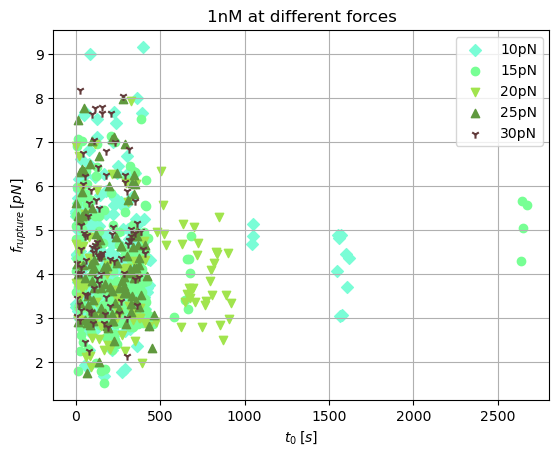

In [3]:
lengths = np.array(lengths).cumsum()
for i in range(res_fold_1nM.shape[0]):
    label = f'{f_MAX[np.where(lengths == i)[0][0]]}pN' if i in lengths else ''
    plt.scatter(res_fold_1nM.t_0[i], res_fold_1nM.f[i], c=res_fold_1nM.c[i], marker=res_fold_1nM.m[i], label=label)
plt.grid()
plt.legend()
plt.xlabel('$t_0\\:[s]$')
plt.ylabel('$f_{rupture}\\: [pN]$')
plt.title("1nM at different forces")
plt.savefig("imgs/1nM/different_forces_folded.png", dpi=300, bbox_inches='tight')
plt.show()

In [4]:
folder = "res/4nM/"

res_fold_4nM = pd.DataFrame(columns=["Molecule", "f", "f_next", "x_ssDNA", "N_nucleotides", "t_0", "c", "m"])
lengths = [0]

for i, f in enumerate(f_MAX):
    path = f'{folder}f_max{f}_folding.txt'
    if os.path.isfile(path):
        data = np.loadtxt(path)
        for j in range(data.shape[0]):
            res_fold_4nM.loc[j+sum(lengths), :-2] = data[j] 
        res_fold_4nM.iloc[sum(lengths):data.shape[0]+sum(lengths), -2] = [colors[i]] * data.shape[0]
        res_fold_4nM.iloc[sum(lengths):data.shape[0]+sum(lengths), -1] = [markers[i]] * data.shape[0]
        lengths.append(data.shape[0])

res_fold_4nM

c:\Users\ricta\Anaconda3\lib\site-packages\pandas\core\indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


,Molecule,f,f_next,x_ssDNA,N_nucleotides,t_0,c,m
0,1.0,4.1596,3.5224,17.976532,59.373001,6.19336,#7afdd6,D
1,1.0,2.726,2.2283,12.459187,51.766303,15.68457,#7afdd6,D
2,1.0,2.1935,1.631,10.808946,51.760004,25.14062,#7afdd6,D
3,1.0,5.0406,4.6523,10.365879,31.479939,28.97266,#7afdd6,D
4,1.0,4.1264,3.6867,11.267324,37.354373,43.76172,#7afdd6,D
...,...,...,...,...,...,...,...,...
419,18.0,2.93008,2.4559,11.048398,43.944132,4645.47766,#e3b505,8
420,18.0,4.1615,3.4746,16.996611,56.124487,4658.1471,#e3b505,8
421,18.0,4.7356,4.1914,14.798949,46.123668,4697.55286,#e3b505,8
422,18.0,4.271,3.6339,15.223767,49.667479,4710.84632,#e3b505,8


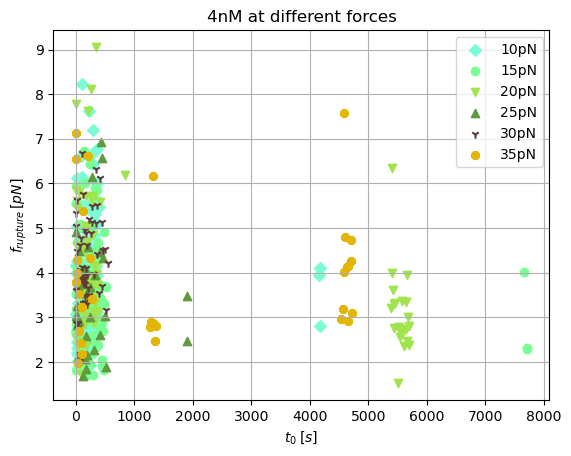

In [5]:
lengths = np.array(lengths).cumsum()
for i in range(res_fold_4nM.shape[0]):
    label = f'{f_MAX[np.where(lengths == i)[0][0]]}pN' if i in lengths else ''
    plt.scatter(res_fold_4nM.t_0[i], res_fold_4nM.f[i], c=res_fold_4nM.c[i], marker=res_fold_4nM.m[i], label=label)
plt.grid()
plt.legend()
plt.xlabel('$t_0\\:[s]$')
plt.ylabel('$f_{rupture}\\: [pN]$')
plt.title("4nM at different forces")
plt.savefig("imgs/4nM/different_forces_folded.png", dpi=300, bbox_inches='tight')
plt.show()

In [6]:
folder = "res/10nM/"

res_fold_10nM = pd.DataFrame(columns=["Molecule", "f", "f_next", "x_ssDNA", "N_nucleotides", "t_0", "c", "m"])
lengths = [0]

for i, f in enumerate(f_MAX):
    path = f'{folder}f_max{f}_folding.txt'
    if os.path.isfile(path):
        data = np.loadtxt(path)
        for j in range(data.shape[0]):
            res_fold_10nM.loc[j+sum(lengths), :-2] = data[j] 
        res_fold_10nM.iloc[sum(lengths):data.shape[0]+sum(lengths), -2] = [colors[i]] * data.shape[0]
        res_fold_10nM.iloc[sum(lengths):data.shape[0]+sum(lengths), -1] = [markers[i]] * data.shape[0]
        lengths.append(data.shape[0])

res_fold_10nM

c:\Users\ricta\Anaconda3\lib\site-packages\pandas\core\indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


,Molecule,f,f_next,x_ssDNA,N_nucleotides,t_0,c,m
0,1.0,3.1415,2.5592,14.607945,55.801388,1.77197,#7afdd6,D
1,1.0,2.6288,1.8374,14.105746,59.94879,5.10254,#7afdd6,D
2,1.0,3.7255,3.2212,12.616548,43.973768,8.91699,#7afdd6,D
3,1.0,3.4667,2.9424,13.049667,47.218937,13.14941,#7afdd6,D
4,1.0,2.8429,2.1012,14.073551,56.995542,39.46777,#7afdd6,D
...,...,...,...,...,...,...,...,...
466,17.0,2.9236,2.5154,7.723117,30.758407,470.48095,#e3b505,8
467,17.0,5.1634,4.5661,13.93536,41.912723,483.02661,#e3b505,8
468,17.0,2.9932,2.6349,7.866913,30.900109,496.35131,#e3b505,8
469,17.0,4.0286,3.491,13.244344,44.412996,509.33422,#e3b505,8


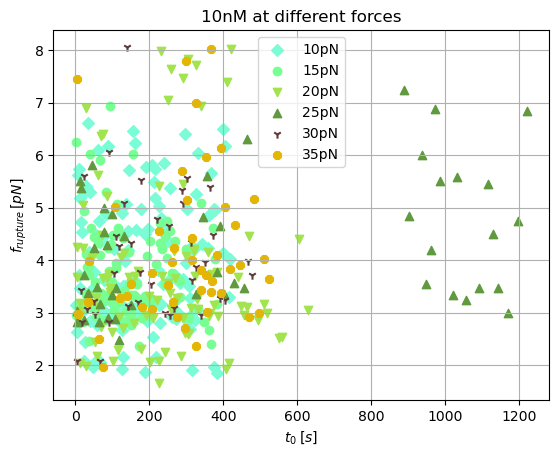

In [7]:
lengths = np.array(lengths).cumsum()
for i in range(res_fold_10nM.shape[0]):
    label = f'{f_MAX[np.where(lengths == i)[0][0]]}pN' if i in lengths else ''
    plt.scatter(res_fold_10nM.t_0[i], res_fold_10nM.f[i], c=res_fold_10nM.c[i], marker=res_fold_10nM.m[i], label=label)
plt.grid()
plt.legend()
plt.xlabel('$t_0\\:[s]$')
plt.ylabel('$f_{rupture}\\: [pN]$')
plt.title("10nM at different forces")
plt.savefig("imgs/10nM/different_forces_folded.png", dpi=300, bbox_inches='tight')
plt.show()

# Different concentrations per force

In [8]:
folders = ["1nM", "4nM", "10nM"]
tot_lengths = [0]
res_fold = pd.DataFrame(columns=["Molecule", "f", "f_next", "x_ssDNA", "N_nucleotides", "t_0", "c", "m"])

for i, f in enumerate(f_MAX):
    lengths = [0]
    for fold in folders:
        path = f'res/{fold}/f_max{f}_folding.txt'
        if os.path.isfile(path):
            data = np.loadtxt(path)
            for j in range(data.shape[0]):
                res_fold.loc[j+tot_lengths[-1]+sum(lengths), :-2] = data[j] 
            res_fold.iloc[tot_lengths[-1]+sum(lengths):data.shape[0]+tot_lengths[-1]+sum(lengths), -2] = [colors[i]] * data.shape[0]   # same color for the same force
            res_fold.iloc[tot_lengths[-1]+sum(lengths):data.shape[0]+tot_lengths[-1]+sum(lengths), -1] = [markers[i]] * data.shape[0]  # same marker for the same force
            lengths.append(data.shape[0])

    tot_lengths.append(res_fold.shape[0])

res_fold

c:\Users\ricta\Anaconda3\lib\site-packages\pandas\core\indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


,Molecule,f,f_next,x_ssDNA,N_nucleotides,t_0,c,m
0,2.0,5.4296,4.8787,15.042231,44.362989,1.11847,#7afdd6,D
1,2.0,4.4341,3.9032,12.412047,39.811415,5.36247,#7afdd6,D
2,2.0,5.6287,5.1907,12.309527,35.813983,12.84492,#7afdd6,D
3,2.0,6.1563,5.5988,14.568402,41.045898,16.73033,#7afdd6,D
4,2.0,5.9207,5.2902,16.997364,48.550386,20.78255,#7afdd6,D
...,...,...,...,...,...,...,...,...
1628,17.0,2.9236,2.5154,7.723117,30.758407,470.48095,#e3b505,8
1629,17.0,5.1634,4.5661,13.93536,41.912723,483.02661,#e3b505,8
1630,17.0,2.9932,2.6349,7.866913,30.900109,496.35131,#e3b505,8
1631,17.0,4.0286,3.491,13.244344,44.412996,509.33422,#e3b505,8


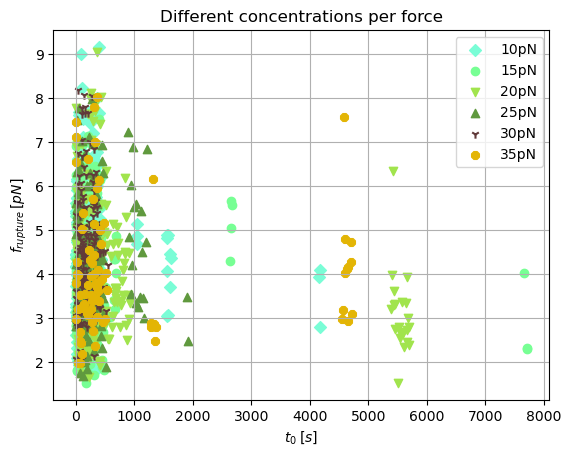

In [9]:
lengths = np.array(tot_lengths)
for i in range(res_fold.shape[0]):
    label = f'{f_MAX[np.where(lengths == i)[0][0]]}pN' if i in lengths else ''
    plt.scatter(res_fold.t_0[i], res_fold.f[i], c=res_fold.c[i], marker=res_fold.m[i], label=label)
plt.grid()
plt.legend()
plt.xlabel('$t_0\\:[s]$')
plt.ylabel('$f_{rupture}\\: [pN]$')
plt.title("Different concentrations per force")
plt.savefig("imgs/different_concentrations_per_force_folded.png", dpi=300, bbox_inches='tight')
plt.show()

# Different forces per concentration

In [10]:
folders = ["1nM", "4nM", "10nM"]
tot_lengths = [0]
res_fold = pd.DataFrame(columns=["Molecule", "f", "f_next", "x_ssDNA", "N_nucleotides", "t_0", "c", "m"])

for i, fold in enumerate(folders):
    lengths = [0]
    for f in f_MAX:
        path = f'res/{fold}/f_max{f}_folding.txt'
        if os.path.isfile(path):
            data = np.loadtxt(path)
            for j in range(data.shape[0]):
                res_fold.loc[j+tot_lengths[-1]+sum(lengths), :-2] = data[j] 
            res_fold.iloc[tot_lengths[-1]+sum(lengths):data.shape[0]+tot_lengths[-1]+sum(lengths), -2] = [colors[i]] * data.shape[0]   # same color for the same force
            res_fold.iloc[tot_lengths[-1]+sum(lengths):data.shape[0]+tot_lengths[-1]+sum(lengths), -1] = [markers[i]] * data.shape[0]  # same marker for the same force
            lengths.append(data.shape[0])

    tot_lengths.append(res_fold.shape[0])

res_fold

c:\Users\ricta\Anaconda3\lib\site-packages\pandas\core\indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


,Molecule,f,f_next,x_ssDNA,N_nucleotides,t_0,c,m
0,2.0,5.4296,4.8787,15.042231,44.362989,1.11847,#7afdd6,D
1,2.0,4.4341,3.9032,12.412047,39.811415,5.36247,#7afdd6,D
2,2.0,5.6287,5.1907,12.309527,35.813983,12.84492,#7afdd6,D
3,2.0,6.1563,5.5988,14.568402,41.045898,16.73033,#7afdd6,D
4,2.0,5.9207,5.2902,16.997364,48.550386,20.78255,#7afdd6,D
...,...,...,...,...,...,...,...,...
1628,17.0,2.9236,2.5154,7.723117,30.758407,470.48095,#a1e44d,v
1629,17.0,5.1634,4.5661,13.93536,41.912723,483.02661,#a1e44d,v
1630,17.0,2.9932,2.6349,7.866913,30.900109,496.35131,#a1e44d,v
1631,17.0,4.0286,3.491,13.244344,44.412996,509.33422,#a1e44d,v


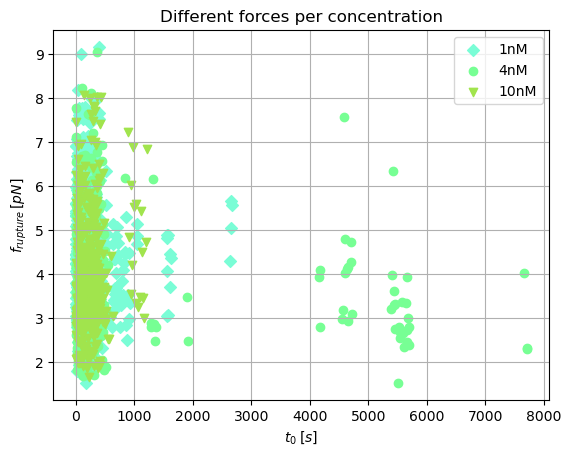

In [11]:
lengths = np.array(tot_lengths)
for i in range(res_fold.shape[0]):
    label = f'{folders[np.where(lengths == i)[0][0]]}' if i in lengths else ''
    plt.scatter(res_fold.t_0[i], res_fold.f[i], c=res_fold.c[i], marker=res_fold.m[i], label=label)
plt.grid()
plt.legend()
plt.xlabel('$t_0\\:[s]$')
plt.ylabel('$f_{rupture}\\: [pN]$')
plt.title("Different forces per concentration")
plt.savefig("imgs/different_forces_per_concentration_folded.png", dpi=300, bbox_inches='tight')
plt.show()